# Moving Averages

source: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

A moving average, aka a rolling or running average, is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. It is also called a moving mean (MM) or rolling mean.

### Simple Moving Average (SMA)
SMA uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous $n$ data. Take an example sequence of $n$ values:
$$  x_1, x_2, \ldots, x_n $$

Then the equally weighted rolling average for $n$ data points will be essentially the mean of the previous $M$ data-points, where $M$ is the size of the sliding window:
$$ \bar{a}_{SM} = \frac{x_n + x_{n-1} + \ldots + x_{M-(n-1)}}{M}  $$
$$ \bar{a}_{SM} = \frac{1}{M} \sum_{i=0}^{n-1} x_{M-i} $$

Similary for calculating succeeding rolling average values, a new value will be added into the sum, and the previous time period value witll be dropped out. Since we already have the average of the previous time periods so full summation each time is not required:
$$ \bar{a}_{SM} = \bar{a}_{SM\_prev} + \frac{1}{n}(x_M - x_{M-n}) $$

In [2]:
# Example SMA calculation

import pandas as pd
import numpy as np

product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}
df = pd.DataFrame(product)
df.head()

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


In [22]:
# calculate SMA for window size = 3
for i in range(0, df.shape[0]-2):
    #print("Actual Value = {0:1.0f}:{1:1.0f}".format(df.iloc[i].month, df.iloc[i].demand))
    df.loc[df.index[i+2], 'SMA_3'] = (df.iloc[i].demand + df.iloc[i+1].demand + df.iloc[i+2].demand)/3
df.head()

,month,demand,SMA_3
0,1,290,NaN
1,2,260,NaN
2,3,288,279.333333
3,4,300,282.666667
4,5,310,299.333333


In [27]:
# check our calculation against Pandas' built-in function
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()
df.head()

,month,demand,SMA_3,pandas_SMA_3
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.333333,279.333333
3,4,300,282.666667,282.666667
4,5,310,299.333333,299.333333


## Cumulative Moving Average (CMA)

Unlike simple moving average which drops the oldest observations as the new one gets added, cumulative moving average considers _all prior observations_.

CMA is not a very good technique for analyzing trends and smoothing out the data, as it averages out all of the previous data up until the current data point, so an equally weighted average of the sequence of $n$ values: $$x_1, x_2, \ldots , x_n$$

$$ CMA_n = \frac{x_1 + x_2 + \ldots + x_n}{n} $$

$$ CMA_{n+1} = \frac{x_{n+1} + n \times CMA_n}{n+1} $$

Use the Air Quality Dataset from https://archive.ics.uci.edu/ml/datasets/air+quality

In [40]:
df_aq = pd.read_csv('data/AirQualityUCI.csv', sep=';', decimal=',')

In [47]:
# use the first 14 columns
df_aq = df_aq.iloc[:, 0:14]
df_aq.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [50]:
# Detect NaN values
df_aq.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
dtype: int64

There are around 114 NaN values across all columns. as they are all at the end of the time-seres, we can safely drop them

In [51]:
df_aq.dropna(inplace = True)

Apply cumulative movingaverage ont he Temperature column (T)

In [110]:
#df_T = pd.DataFrame(df_aq.iloc[:, -2])
df_T = pd.DataFrame(df_aq['T'])
df_T.head()

,T
0,13.6
1,13.3
2,11.9
3,11.0
4,11.2


Use the pandas _expanding_ method to find the cumulative average of the above data. Note cumuluative moving average considers all of the preceding values when calculating the average.


In [111]:
df_T['CMA_4']=df_T.expanding(min_periods=4).mean()

In [112]:
import datetime
df_aq['DateTime']=(df_aq.Date) + ' ' + (df_aq.Time)
df_aq.DateTime = df_aq.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))
df_T.index = df_aq.DateTime
df_T.head()

,T,CMA_4
DateTime,,
2004-03-10 18:00:00,13.6,NaN
2004-03-10 19:00:00,13.3,NaN
2004-03-10 20:00:00,11.9,NaN
2004-03-10 21:00:00,11.0,12.45
2004-03-10 22:00:00,11.2,12.20


<AxesSubplot:xlabel='DateTime', ylabel='Temperature'>

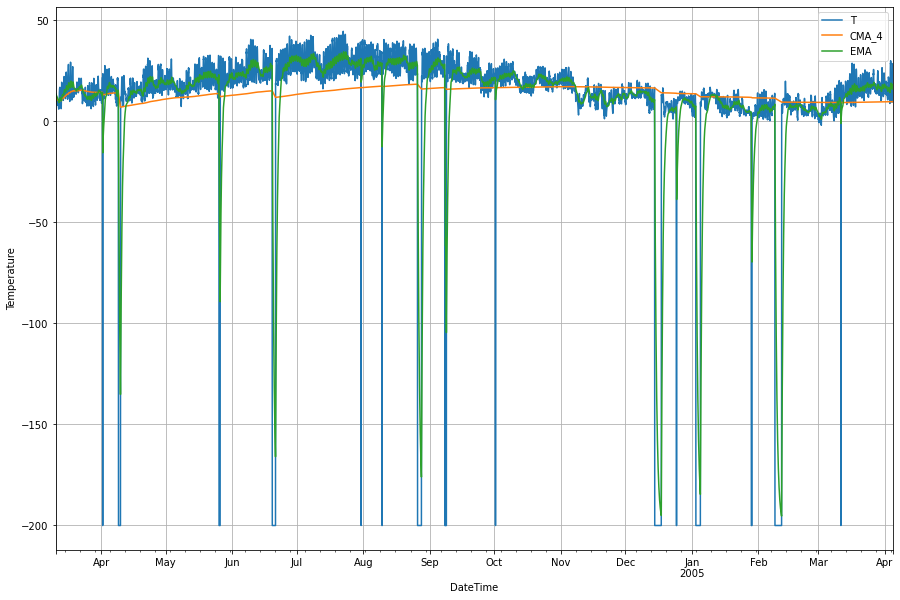

In [127]:
# Plot temperature wrt datetime
df_T.plot(ylabel='Temperature', figsize=[15,10], grid=True)

## Exponential Moving Average (EMA)

EMA does a much better job of capturing the pattern of the data. Unlike SMA and CMA, EMA gives more weight to the recent prices and as a result, it is better at capturing trends.

In [125]:
df_T['EMA'] = df_T.iloc[:,0].ewm(span=40, adjust=False).mean()

In [126]:
df_T.head()

,T,CMA_4,EMA
DateTime,,,
2004-03-10 18:00:00,13.6,NaN,13.600000
2004-03-10 19:00:00,13.3,NaN,13.585366
2004-03-10 20:00:00,11.9,NaN,13.503153
2004-03-10 21:00:00,11.0,12.45,13.381048
2004-03-10 22:00:00,11.2,12.20,13.274655


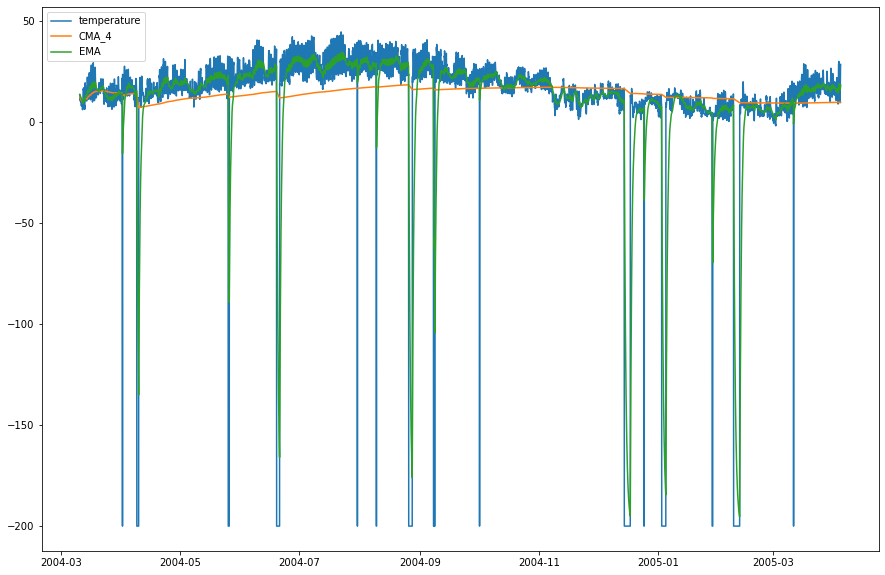

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[15,10])
plt.grid=True
plt.plot(df_T['T'], label = 'temperature')
plt.plot(df_T['CMA_4'], label = 'CMA_4')
plt.plot(df_T['EMA'], label = 'EMA')
plt.legend(loc=2)